Epoch: 0          Loss: 195601
Epoch: 1000       Loss: inf
Epoch: 2000       Loss: 165410
Epoch: 3000       Loss: 163833
Epoch: 4000       Loss: 162901
Epoch: 5000       Loss: 162443
Epoch: 6000       Loss: 162122
Epoch: 7000       Loss: 162024
Epoch: 8000       Loss: 162003
Epoch: 9000       Loss: 161998


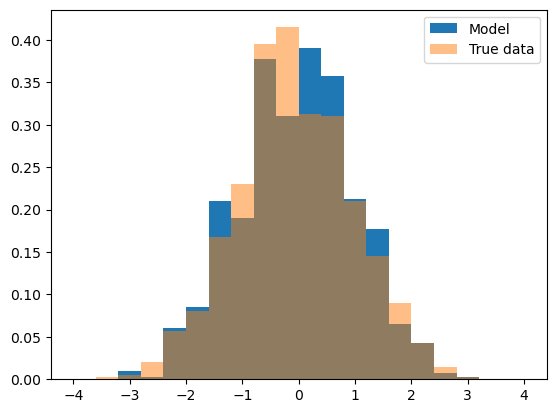

In [32]:
import matplotlib.pyplot as plt
import torch
import pytorch_measure as pm
N = 50 # number of weights
data = torch.randn(50000)
#l = [min(data).item(), max(data).item()]
w = torch.softmax(torch.ones(N,dtype=torch.float),dim=-1)
l = torch.linspace(-4, 4, N)
# if l is min & max only
#index = [round((y.item() - l[0]) * (N - 1) / (l[1] - l[0])) for y in data]
# if l is all locations
index = torch.argmin(abs(l-data.view(-1,1)), dim=1)
def loss_fn(w):
    return -w[index].log().sum()

def test_step(verbose):
    measure = pm.PytorchMeasure(l, w)
    for epoch in range(10000):
        measure.step(loss_fn, 0.01)
        if epoch % 1000 == 0 and verbose:
            print(f'Epoch: {epoch:<10} Loss: {measure.loss:.0f}')
    plt.hist(measure.sample(1000),bins=20, density=True, range=[-4,4])
    plt.hist(torch.randn(1000),bins=20, density=True, range=[-4,4], alpha=0.5)
    plt.legend(['Model','True data'])
    plt.show()

test_step(verbose=True)


In [20]:
data = torch.randn(2000)
l = [min(data).item(), max(data).item()]
N = 21
def loss_fn(w):
    # Funkar inte riktigt
    log_prob = 0
    for y in data:
        # Remap y from l to range(len(w))
        i = round((y.item() - l[0]) * (len(w) - 1) / (l[1] - l[0]))
        log_prob += torch.log(w[i])
    return -log_prob

def test_step():
    w = torch.softmax(torch.rand(N), dim=0)
    loc = torch.linspace(min(data).item(), max(data).item(), N)
    measure = pm.PytorchMeasure(loc, w)
    for epoch in range(500):
        measure.step(loss_fn, 0.05)
    measure.visualize()
    print(measure)

test_step()



KeyboardInterrupt: 

In [65]:
m = torch.nn.Softmax(dim=1)
loss = torch.nn.NLLLoss()
# input is of size N x C = 3 x 5
input = torch.rand(3,5,requires_grad=True)
# each element in target has to have 0 <= value < C
target = torch.tensor([1, 0, 3])
output = loss(input, target)
output.backward()
print(input.grad)
print(input)

tensor([[ 0.0000, -0.3333,  0.0000,  0.0000,  0.0000],
        [-0.3333,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000, -0.3333,  0.0000]])
tensor([[0.4657, 0.2328, 0.4527, 0.5871, 0.4086],
        [0.1272, 0.6373, 0.2421, 0.7312, 0.7224],
        [0.1992, 0.6948, 0.5830, 0.6318, 0.5559]], requires_grad=True)
